**DATA PREPARATION**

In [2]:
import pandas as pd
df=pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,0,1855-05-01,25.544,1.171,Acre,Brazil
1,1,1855-06-01,24.228,1.103,Acre,Brazil
2,2,1855-07-01,24.371,1.044,Acre,Brazil
3,3,1855-08-01,25.427,1.073,Acre,Brazil
4,4,1855-09-01,25.675,1.014,Acre,Brazil


In [5]:
df.dtypes

index                              int64
dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [6]:
df.shape

(645675, 6)

In [7]:
df.isnull().sum()

index                                0
dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [8]:
df=df.dropna(how='any',axis=0)

In [9]:
df.shape

(620027, 6)

In [10]:
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)
df.head()

,index,Date,Avg_temp,confidence_interval_temp,State,Country
0,0,1855-05-01,25.544,1.171,Acre,Brazil
1,1,1855-06-01,24.228,1.103,Acre,Brazil
2,2,1855-07-01,24.371,1.044,Acre,Brazil
3,3,1855-08-01,25.427,1.073,Acre,Brazil
4,4,1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
#index it using time based indexing/date 
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [12]:
df.describe()

,index,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000,620027.000000
mean,322847.420395,8.993111,1.287647
std,186683.711645,13.772150,1.360392
min,0.000000,-45.389000,0.036000
25%,160799.500000,-0.693000,0.316000
50%,322231.000000,11.199000,0.656000
75%,485304.500000,19.899000,1.850000
max,645673.000000,36.339000,12.646000


In [13]:
#create a seperate year column
df['Year']=df.index.year
df.head()

,index,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,,
1855-05-01,0,25.544,1.171,Acre,Brazil,1855
1855-06-01,1,24.228,1.103,Acre,Brazil,1855
1855-07-01,2,24.371,1.044,Acre,Brazil,1855
1855-08-01,3,25.427,1.073,Acre,Brazil,1855
1855-09-01,4,25.675,1.014,Acre,Brazil,1855


In [14]:
df.describe()

,index,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000,620027.000000
mean,322847.420395,8.993111,1.287647,1902.331598
std,186683.711645,13.772150,1.360392,67.831393
min,0.000000,-45.389000,0.036000,1743.000000
25%,160799.500000,-0.693000,0.316000,1851.000000
50%,322231.000000,11.199000,0.656000,1906.000000
75%,485304.500000,19.899000,1.850000,1960.000000
max,645673.000000,36.339000,12.646000,2013.000000


**Here the min year is 1743 and the max year is 2013.We will pick a range from 1980 to 2013 to analyze the data**

In [15]:
latest_df=df.loc['1980':'2013']
latest_df.head()

,index,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,,
1980-01-01,1496,26.652,0.190,Acre,Brazil,1980
1980-02-01,1497,26.495,0.495,Acre,Brazil,1980
1980-03-01,1498,26.270,0.236,Acre,Brazil,1980
1980-04-01,1499,26.430,0.201,Acre,Brazil,1980
1980-05-01,1500,25.802,0.882,Acre,Brazil,1980


**group by average temperature of countries**

In [16]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.681256
Russia,2.432833
United States,11.516373
China,12.150210
Australia,18.447621
India,22.871669
Brazil,24.537580


**lowest average temperature in canada,highest in brazil**

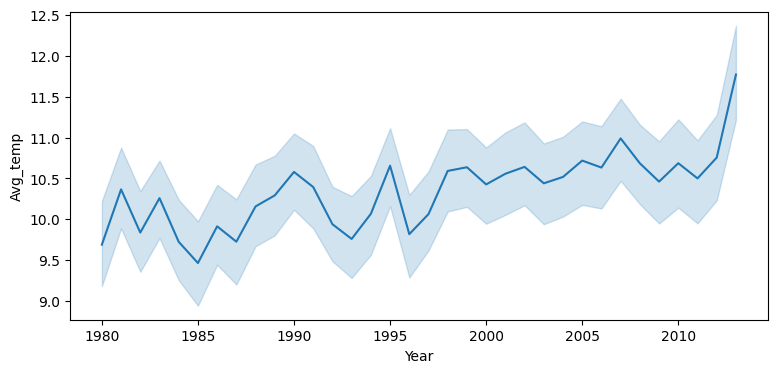

In [17]:
#plot average temperature of different years from 1980 to 2013
plt.figure(figsize=(9,4))
sns.lineplot(x='Year',y='Avg_temp',data=latest_df)
plt.show()

**we see that unfortunately, the average temperature seems to be rising**

In [20]:
#data grouped by year, and mean applied to each group to calculate annual average temperature
resample_df=latest_df[['Avg_temp']].resample('A').mean()
resample_df.head()

,Avg_temp
Date,
1980-12-31,9.689856
1981-12-31,10.366578
1982-12-31,9.837958
1983-12-31,10.259516
1984-12-31,9.724950


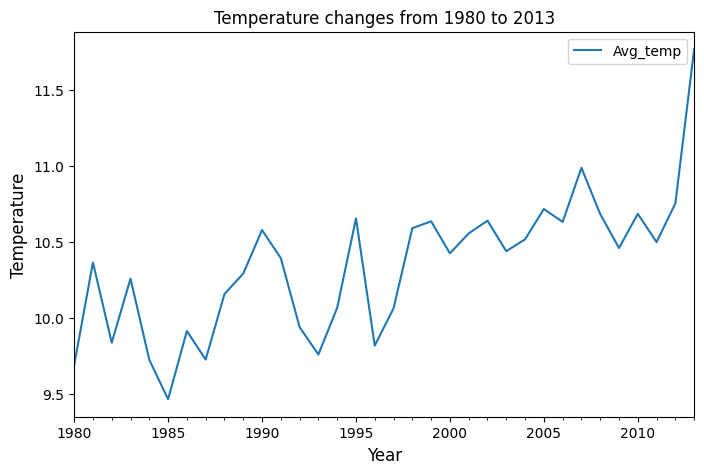

In [21]:
resample_df.plot(title='Temperature changes from 1980 to 2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

**APPLY DICKEY-FULLER TEST TO SEE IF THE DATA IS STATIONARY OR NOT. THE NULL HYPOTHESIS IS THAT IT IS NOT STATIONARY**

In [22]:
from statsmodels.tsa.stattools import adfuller

print('Dickey Fuller Test Results')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key]=value
print(df_output)

Dickey Fuller Test Results
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


**The p-value is above the threshold 0.05. This indicates that it is likely non stationary**

In [25]:
decomp=seasonal_decompose(resample_df,period=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

1)The trend component represents the underlying, long-term movement in the data over time. It shows the overall direction in which the data is moving, regardless of any short-term fluctuations or seasonality. 

2)The seasonal component captures regular patterns that repeat at fixed intervals within the time series data.

3)The residual component represents the remaining variation in the data that cannot be explained by the trend or the seasonal component.

<Figure size 600x500 with 0 Axes>

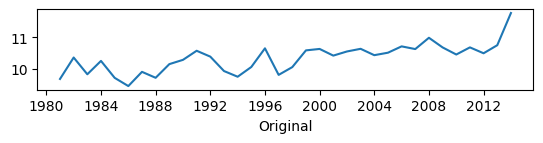

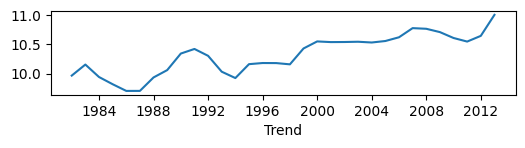

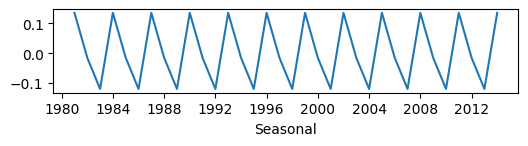

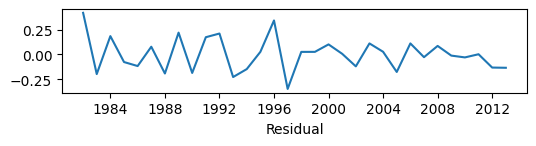

<Figure size 600x500 with 0 Axes>

In [26]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

**Increasing trend line which proves that data is not stationery,we want it to be constant over time**

**Transform data using moving average and exponential smoothing**

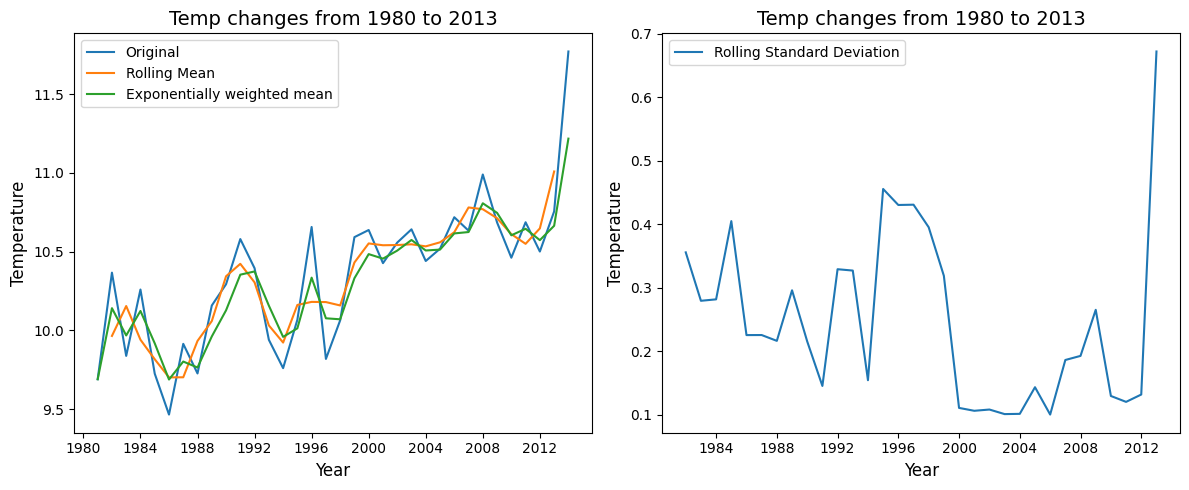

In [30]:
#Rolling mean 
rol_mean=resample_df.rolling(window=3,center=True).mean()

#exponentially weighted mean
ewm=resample_df.ewm(span=3).mean()

#rolling standard deviation
rol_std=resample_df.rolling(window=3,center=True).std()

#create subplots next to each other
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(12,5))

#Temperature graph with rolling mean and exponentially weighted mean
ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(evm,label='Exponentially weighted mean')
ax1.set_title('Temp changes from 1980 to 2013',fontsize=14)
ax1.set_xlabel('Year',fontsize=12)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.legend()

#Temperature graph with rolling standard deviation
ax2.plot(rol_std,label='Rolling Standard Deviation')
ax2.set_title('Temp changes from 1980 to 2013',fontsize=14)
ax2.set_xlabel('Year',fontsize=12)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()



**Original Data Line: The blue line represents the original temperature data from 1980 to 2013. This line shows the actual temperature values over time.**

**Rolling Mean Line: The orange line represents the rolling mean of the temperature data. The rolling mean is calculated over a window of 3 years (with center=True), which means each point on the rolling mean line is the average of the temperatures in the current year, the previous year, and the following year.**

**Exponentially Weighted Mean Line: The green line represents the exponentially weighted mean of the temperature data. The exponentially weighted mean assigns more weight to recent data points and less weight to older data points. This can help in capturing short-term trends or fluctuations in the data.**

**Rolling Standard Deviation-In this subplot, you can see how the rolling standard deviation changes over time. A higher rolling standard deviation suggests more variability or fluctuations in the temperature data, while a lower rolling standard deviation indicates relatively stable temperature patterns**

In [31]:
#Again apply Dickey Fuller Test and see hypothesis
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

#for rolling mean
print("Dickey-Fuller Test for Rolling Mean:")
test_rol_mean = adfuller(rol_mean.iloc[:, 0].values, autolag='AIC')
print("Test Statistic:", test_rol_mean[0])
print("p-value:", test_rol_mean[1])
print("Lags Used:", test_rol_mean[2])
print("Number of Observations Used:", test_rol_mean[3])
print("Critical Values:")
for key, value in test_rol_mean[4].items():
    print(f"\t{key}: {value}")
    
#for exponentially weighted mean
print("\nDickey-Fuller Test for Exponentially Weighted Mean:")
test_ewm = adfuller(ewm.iloc[:, 0].values, autolag='AIC')
print("Test Statistic:", test_ewm[0])
print("p-value:", test_ewm[1])
print("Lags Used:", test_ewm[2])
print("Number of Observations Used:", test_ewm[3])
print("Critical Values:")
for key, value in test_ewm[4].items():
    print(f"\t{key}: {value}")



Dickey-Fuller Test for Rolling Mean:
Test Statistic: 0.2751013560923563
p-value: 0.9761728664960192
Lags Used: 8
Number of Observations Used: 23
Critical Values:
	1%: -3.7529275211638033
	5%: -2.998499866852963
	10%: -2.6389669754253307

Dickey-Fuller Test for Exponentially Weighted Mean:
Test Statistic: -0.3386929820279713
p-value: 0.9198426634636435
Lags Used: 2
Number of Observations Used: 31
Critical Values:
	1%: -3.661428725118324
	5%: -2.960525341210433
	10%: -2.6193188033298647


**The p-value for the rolling mean test is significantly higher than the common significance level of 0.05. This suggests that we don't have strong evidence to reject the null hypothesis of non-stationarity. Furthermore, the test statistic is positive and greater than all the critical values, indicating that the rolling mean series is likely non-stationary.**

**We are removing the trend factor and converting to detrended data for stationarity**

In [32]:
diff_rol_mean=resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [33]:
diff_ewm=resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


**We are calculating the rolling mean of the detrended data obtained from the differences between the original temperature data and the rolling mean (diff_rol_mean), and similarly for the exponentially weighted mean (diff_ewm).**

In [91]:
df_rol_mean_diff=diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff=diff_ewm.ewm(span=3).mean()

**This visualization allows you to compare the detrended data and its rolling mean side by side, helping you understand how the rolling mean affects the detrended data and how it helps in smoothing out the short-term fluctuations.**

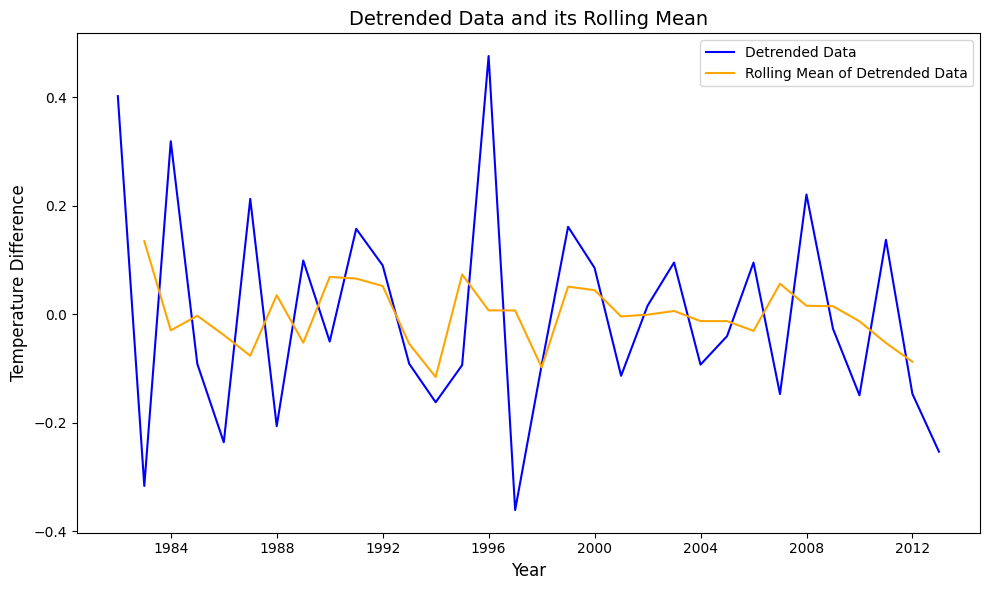

In [92]:
# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot detrended data and its rolling mean
ax1.plot(diff_rol_mean, label='Detrended Data', color='blue')
ax1.plot(df_rol_mean_diff, label='Rolling Mean of Detrended Data', color='orange')

# Set labels and title
ax1.set_title('Detrended Data and its Rolling Mean', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Temperature Difference', fontsize=12)

# Display legend
ax1.legend()

plt.tight_layout()
plt.show()




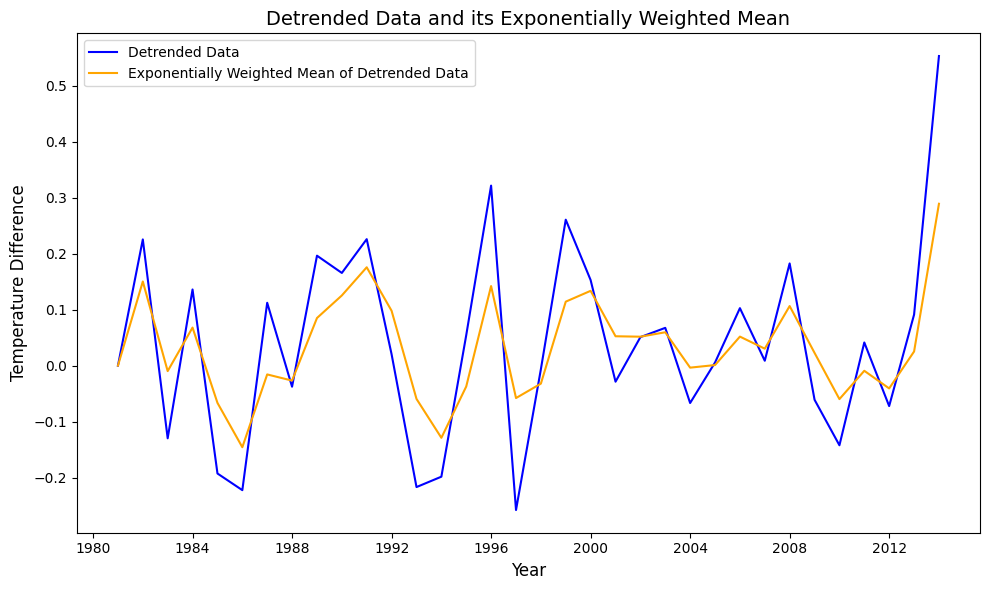

In [93]:
# Create subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot detrended data and its exponentially weighted mean
ax1.plot(diff_ewm, label='Detrended Data', color='blue')
ax1.plot(df_ewm_diff, label='Exponentially Weighted Mean of Detrended Data', color='orange')

# Set labels and title
ax1.set_title('Detrended Data and its Exponentially Weighted Mean', fontsize=14)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Temperature Difference', fontsize=12)

# Display legend
ax1.legend()

plt.tight_layout()
plt.show()


In [38]:
# Dickey-Fuller test for the difference between original data and rolling mean
print("Dickey-Fuller Test for Difference between Original Data and Rolling Mean:")
test_diff_rol_mean = adfuller(diff_rol_mean.iloc[:, 0].values, autolag='AIC')
print("Test Statistic:", test_diff_rol_mean[0])
print("p-value:", test_diff_rol_mean[1])
print("Lags Used:", test_diff_rol_mean[2])
print("Number of Observations Used:", test_diff_rol_mean[3])
print("Critical Values:")
for key, value in test_diff_rol_mean[4].items():
    print(f"\t{key}: {value}")

# Dickey-Fuller test for the difference between original data and exponentially weighted mean
print("\nDickey-Fuller Test for Difference between Original Data and Exponentially Weighted Mean:")
test_diff_ewm = adfuller(diff_ewm.iloc[:, 0].values, autolag='AIC')
print("Test Statistic:", test_diff_ewm[0])
print("p-value:", test_diff_ewm[1])
print("Lags Used:", test_diff_ewm[2])
print("Number of Observations Used:", test_diff_ewm[3])
print("Critical Values:")
for key, value in test_diff_ewm[4].items():
    print(f"\t{key}: {value}")


Dickey-Fuller Test for Difference between Original Data and Rolling Mean:
Test Statistic: -7.00770991175455
p-value: 7.051586169495832e-10
Lags Used: 1
Number of Observations Used: 30
Critical Values:
	1%: -3.6699197407407405
	5%: -2.9640707407407407
	10%: -2.621171111111111

Dickey-Fuller Test for Difference between Original Data and Exponentially Weighted Mean:
Test Statistic: -4.297445827209394
p-value: 0.00044875820281763514
Lags Used: 1
Number of Observations Used: 32
Critical Values:
	1%: -3.653519805908203
	5%: -2.9572185644531253
	10%: -2.6175881640625


**The p-value for the test involving the differences between the original data and the rolling mean is extremely low (much smaller than 0.05). This indicates strong evidence to reject the null hypothesis of non-stationarity. The test statistic is significantly negative and lower (in magnitude) than all the critical values, providing further support for stationarity.**

**We now use the SARIMA ( Seasonal Autoregressive Integrated Moving Average) model**

In [49]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

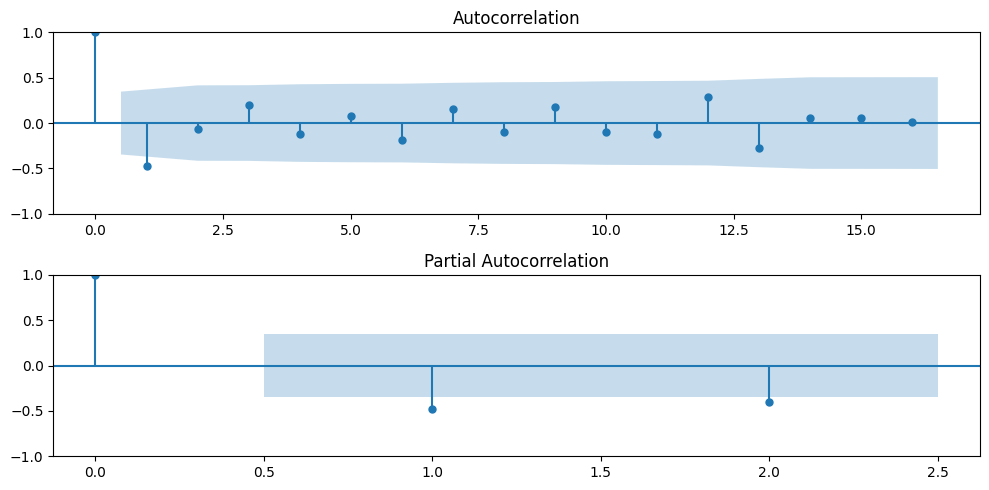

In [109]:
plt.figure(figsize=(10, 5))

# Plot ACF 
plt.subplot(211)
plot_acf(diff_rol_mean, ax=plt.gca())

# Plot PACF for df_rol_mean_diff
plt.subplot(212)
plot_pacf(diff_rol_mean, ax=plt.gca(), lags=2)

plt.tight_layout()
plt.show()






In [110]:
train_percentage = 0.8  # 80% for training
split_index = int(len(diff_rol_mean) * train_percentage)
train_data = diff_rol_mean.iloc[:split_index]
test_data = diff_rol_mean.iloc[split_index:]

In [111]:
print("Training data length:", len(train_data))
print("Test data length:", len(test_data))

Training data length: 25
Test data length: 7


In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(1,0,0)(1,0,0,12) model to the data
model = SARIMAX(train_data, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
fitted_model = model.fit(disp=False)


In [113]:
predictions = fitted_model.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

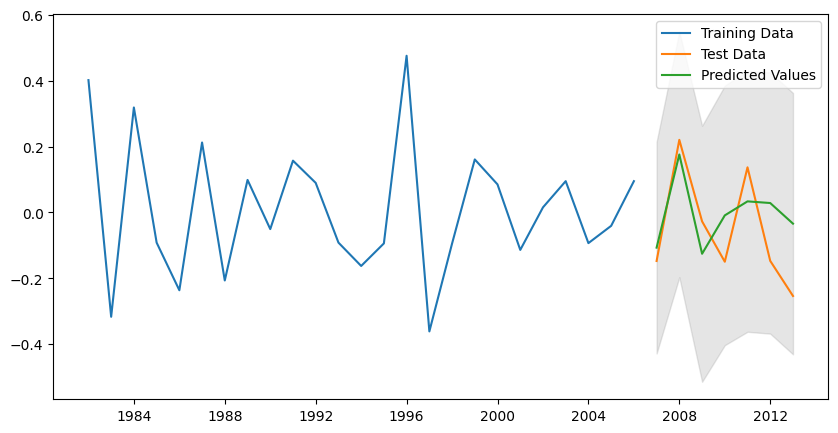

In [114]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(predicted_values, label='Predicted Values')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.show()

In [115]:
print(fitted_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           Avg_temp   No. Observations:                   25
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                   9.076
Date:                            Wed, 16 Aug 2023   AIC                            -12.151
Time:                                    00:02:58   BIC                             -8.495
Sample:                                12-31-1981   HQIC                           -11.137
                                     - 12-31-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5873      0.209     -2.812      0.005      -0.997      -0.178
ar.S.L12       0.2694      0.258   

In [116]:
mse = mean_squared_error(test_data, predicted_values)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)





Mean Squared Error (MSE): 0.017544088449140828
Root Mean Squared Error (RMSE): 0.1324540994048158


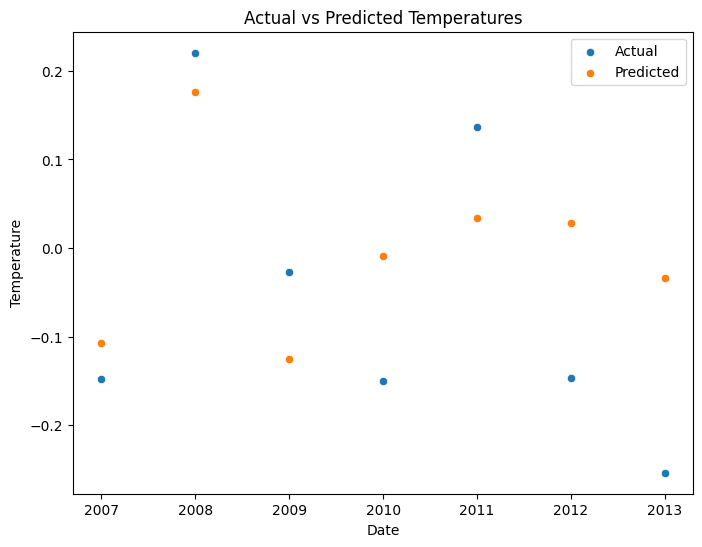

In [117]:
#scatter plot for actual versus predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=test_data.index, y=test_data['Avg_temp'], label='Actual')
sns.scatterplot(x=test_data.index, y=predicted_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperatures')
plt.legend()
plt.show()